In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


% of people who embarked at Queenstown and survived: 0.38961038961038963 
 total amount of people who embarked: 77
% of people who embarked at Southampton and survived: 0.33695652173913043 
 total amount of people who embarked: 644
% of people who embarked at Cherbourg and survived: 0.5535714285714286 
 total amount of people who embarked: 168


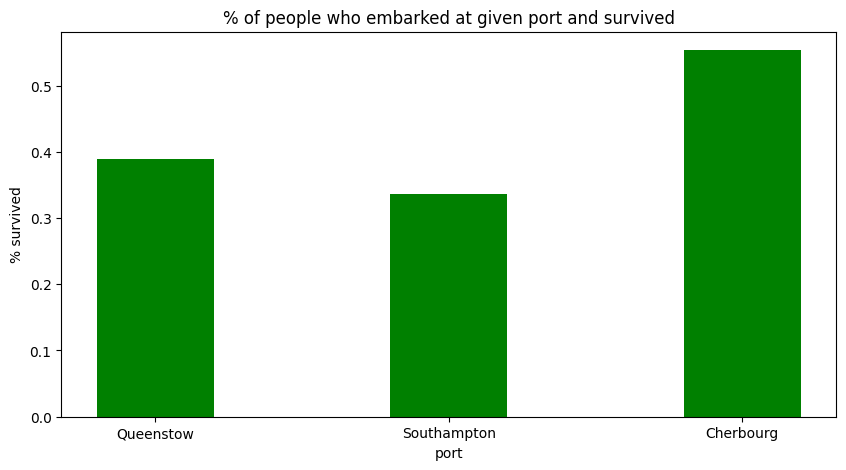

In [4]:
embarked_Q = train_data.loc[train_data.Embarked == 'Q']["Survived"]
rate_embarked_Q = sum(embarked_Q)/len(embarked_Q)

print("% of people who embarked at Queenstown and survived:", rate_embarked_Q, "\n total amount of people who embarked:", len(embarked_Q))

embarked_S = train_data.loc[train_data.Embarked == 'S']["Survived"]
rate_embarked_S = sum(embarked_S)/len(embarked_S)

print("% of people who embarked at Southampton and survived:", rate_embarked_S, "\n total amount of people who embarked:", len(embarked_S))

embarked_C = train_data.loc[train_data.Embarked == 'C']["Survived"]
rate_embarked_C = sum(embarked_C)/len(embarked_C)

print("% of people who embarked at Cherbourg and survived:", rate_embarked_C, "\n total amount of people who embarked:", len(embarked_C))

embarked=[rate_embarked_Q, rate_embarked_S, rate_embarked_C]

port = ['Queenstow','Southampton','Cherbourg']

fig = plt.figure(figsize = (10, 5))

plt.bar(port, embarked, color ='green',
        width = 0.4)

plt.xlabel("port")
plt.ylabel("% survived")
plt.title("% of people who embarked at given port and survived")
plt.show()

% of people who were at 3rd class and survived: 0.24236252545824846 
 total amount of people who embarked: 491 
 survived: 119
% of people who were at 2nd class and survived: 0.47282608695652173 
 total amount of people who embarked: 184 
 survived: 87
% of people who were at 1st class and survived: 0.6296296296296297 
 total amount of people who embarked: 216 
 survived: 136


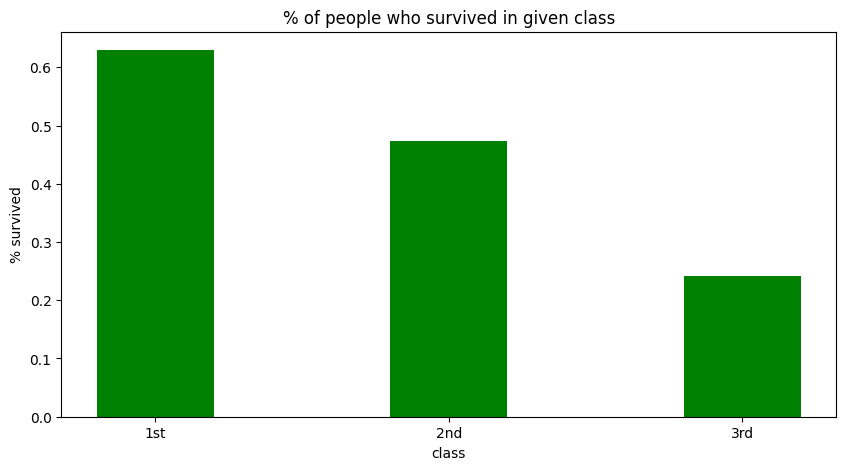

In [5]:
pclass_3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_pclass_3 = sum(pclass_3)/len(pclass_3)

print("% of people who were at 3rd class and survived:", rate_pclass_3, "\n total amount of people who embarked:", len(pclass_3), "\n survived:", sum(pclass_3))

pclass_2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_pclass_2 = sum(pclass_2)/len(pclass_2)

print("% of people who were at 2nd class and survived:", rate_pclass_2, "\n total amount of people who embarked:", len(pclass_2), "\n survived:", sum(pclass_2))

pclass_1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_pclass_1 = sum(pclass_1)/len(pclass_1)

print("% of people who were at 1st class and survived:", rate_pclass_1, "\n total amount of people who embarked:", len(pclass_1), "\n survived:", sum(pclass_1))

embarked=[rate_pclass_1, rate_pclass_2, rate_pclass_3]

classes = ['1st','2nd','3rd']

fig = plt.figure(figsize = (10, 5))

plt.bar(classes, embarked, color ='green',
        width = 0.4)

plt.xlabel("class")
plt.ylabel("% survived")
plt.title("% of people who survived in given class")
plt.show()

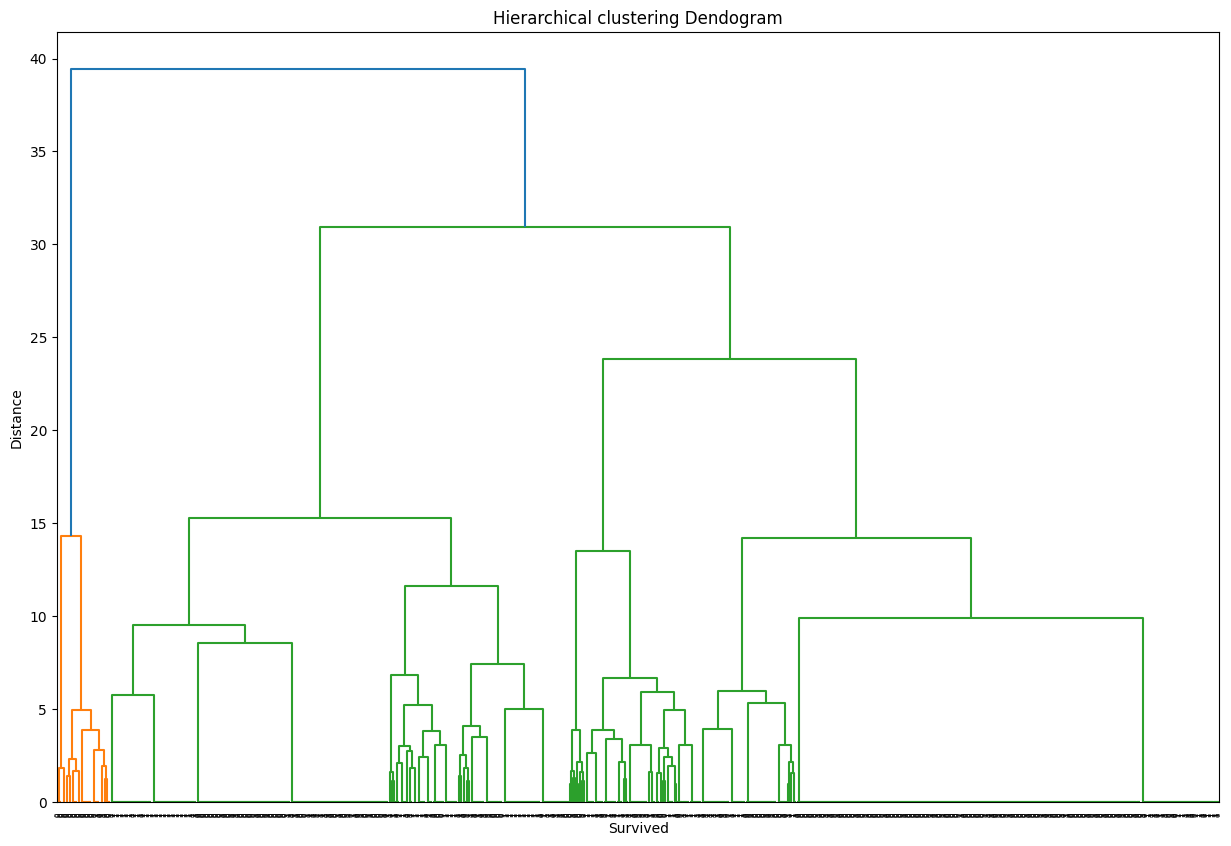

In [6]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = train_data[features]

linkage_matrix=linkage(X,method='ward')

plt.figure(figsize=(15,10))
dendrogram(linkage_matrix,labels=train_data['Survived'].values, color_threshold=33,leaf_rotation=90)
plt.title("Hierarchical clustering Dendogram")
plt.xlabel('Survived')
plt.ylabel('Distance')
plt.show()


Opisywana zmienność:  [0.38439582 0.27871423 0.19653216 0.14035779]


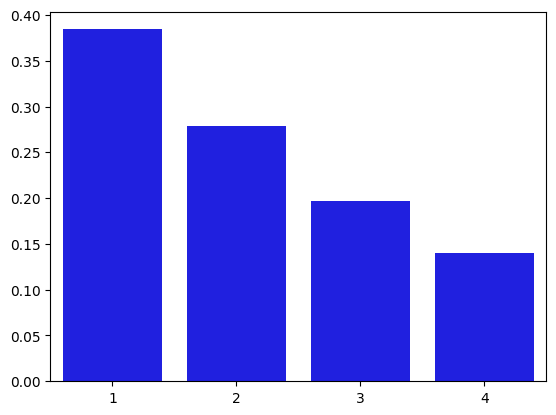

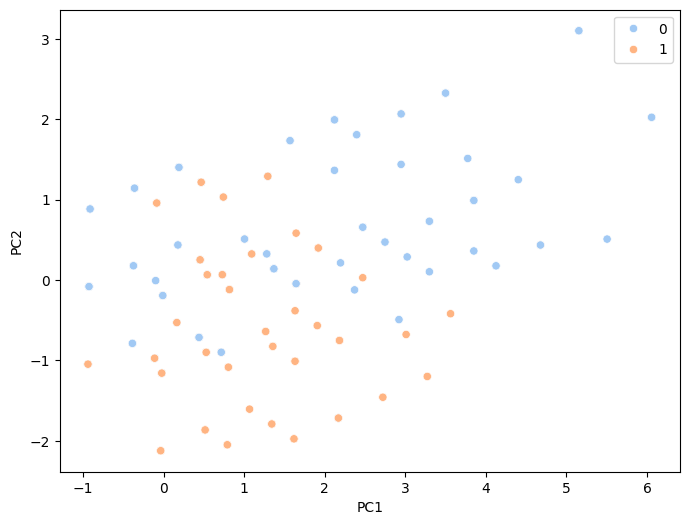

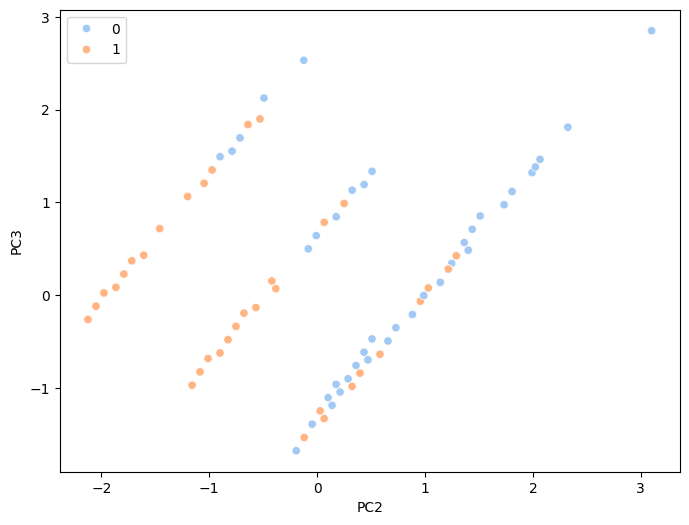

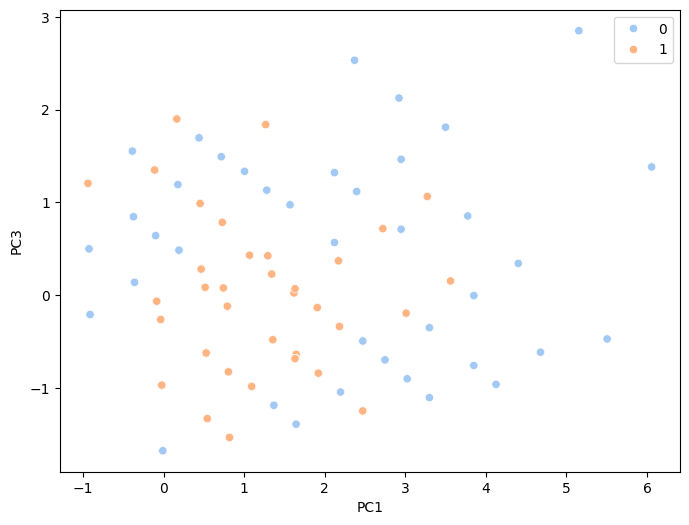

In [7]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
pca = PCA(n_components=4)
x_pca = pca.fit_transform(scaled_data)

print('\nOpisywana zmienność: ', pca.explained_variance_ratio_)
sns.barplot(x=np.arange(1,5), y=pca.explained_variance_ratio_, color='blue')
plt.show()

plt.figure(figsize =(8, 6))
sns.scatterplot(x=x_pca[:,0],
y=x_pca[:,1],hue=train_data['Survived'],palette="pastel")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Wyniki - rzut na PC2/PC3
plt.figure(figsize =(8, 6))
sns.scatterplot(x=x_pca[:,1], y=x_pca[:,2], hue=train_data['Survived'], palette="pastel")
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.legend()
plt.show()

# Wyniki - rzut na PC1/PC3
plt.figure(figsize =(8, 6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,2], hue=train_data['Survived'], palette="pastel")
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.legend()
plt.show()

Accuracy (mean):  0.7845059184745284


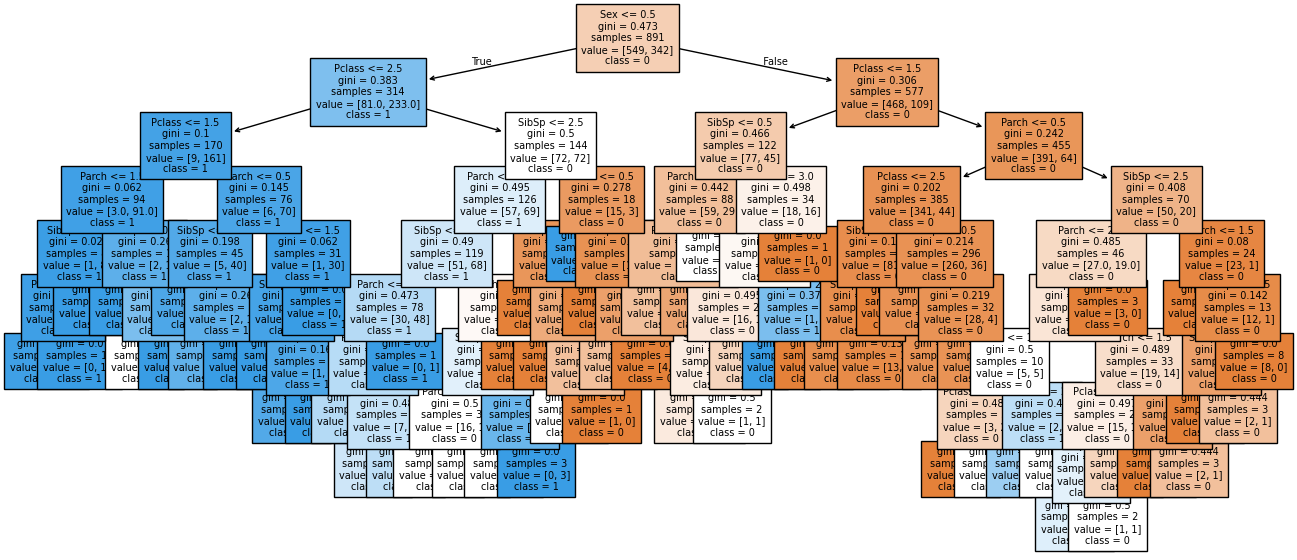

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier()
# definicja klasyfikatora
scores = cross_val_score(clf, X, y, cv=4)
# walidacja krzyżowa
print('Accuracy (mean): ', scores.mean())

clf = clf.fit(X, y) # uczenie klasyfikatora
plt.figure(figsize=(16,7)) #odpowiednio dopasować: figsize, fontsize
tree.plot_tree(clf, fontsize=7, filled=True, feature_names=["Pclass", "Sex", "SibSp", "Parch"], class_names=['0','1'])
plt.savefig('DTiris.png') #zapis do pliku
plt.show()


Feature importances
Pclass    0.214077
Sex       0.626655
SibSp     0.082820
Parch     0.076448
dtype: float64


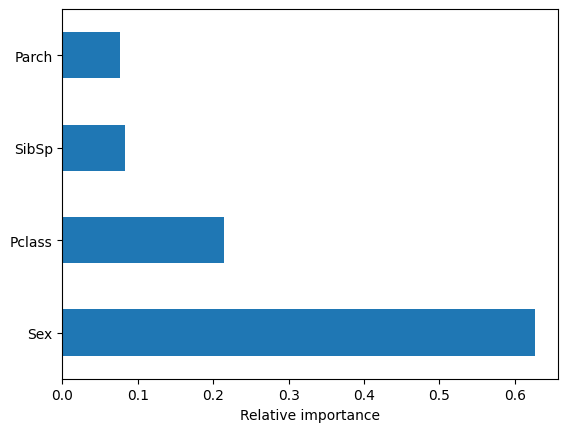

In [9]:
# Badanie istotności cech
print('\nFeature importances')
importances = pd.Series(clf.feature_importances_, index=["Pclass", "Sex", "SibSp", "Parch"])
print(importances)
importances.nlargest(4).plot(kind='barh')
plt.xlabel('Relative importance')
plt.show()

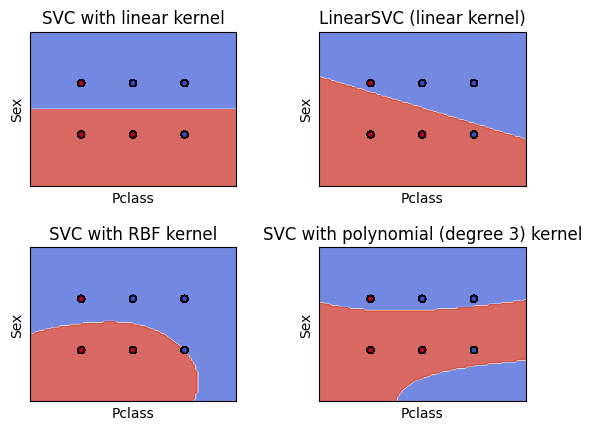

In [10]:
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

features = ["Pclass", "Sex"]
X = train_data[features]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0 = X["Pclass"]
X1 = X["Sex"]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Pclass",
        ylabel="Sex",
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()